In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

In [13]:
column_names1=["song_id","song_name"]
df=pd.read_fwf("ydata-ymusic-artist-names-v1_0.txt",sep="\t",names=column_names1)

In [14]:
df

,song_id,song_name
0,NaN,NaN
1,1000001.0,"Bobby ""O"""
2,1000002.0,"Jimmy ""Z"""
3,1000003.0,'68 Comeback
4,1000004.0,'Til Tuesday
...,...,...
97950,1101110.0,14 Karat Soul
97951,1101111.0,The Relativez
97952,1101112.0,Crooked I
97953,1101113.0,SKG


In [51]:
column_names2=["user_id","song_id","ratings"]
df1=pd.read_csv("Book1.csv",names=column_names2)

In [52]:
df1

,user_id,song_id,ratings
0,1,1000125,90
1,1,1006373,100
2,1,1006978,90
3,1,1007035,100
4,1,1007098,100
...,...,...,...
61236,1007,1098270,74
61237,1007,1098273,64
61238,1007,1098304,50
61239,1007,1098329,70


In [53]:
df_main=pd.merge(df,df1,on="song_id")

In [54]:
df_main

,song_id,song_name,user_id,ratings
0,1000004.0,'Til Tuesday,76,10
1,1000004.0,'Til Tuesday,313,80
2,1000004.0,'Til Tuesday,509,90
3,1000004.0,'Til Tuesday,726,81
4,1000004.0,'Til Tuesday,856,80
...,...,...,...,...
61188,1100995.0,Courtney Love,933,0
61189,1101022.0,Shakatura,102,50
61190,1101025.0,Teedra Moses,317,30
61191,1101025.0,Teedra Moses,652,0


In [55]:
df_main.groupby("song_name")["ratings"].count().sort_values(ascending=False).head()

song_name
Linkin Park              389
Evanescence              311
Eminem                   303
Missy Elliott            295
Red Hot Chili Peppers    289
Name: ratings, dtype: int64

In [56]:
ratings=pd.DataFrame(df_main.groupby("song_name")["ratings"].mean())

In [57]:
ratings

,ratings
song_name,
!!!,90.000000
'Til Tuesday,65.166667
(Hed) P.E.,90.000000
*NSYNC,61.631579
.38 Special,55.857143
...,...
Zoegirl,70.000000
Zombie Nation,60.000000
Zoo Story,0.000000


In [89]:
ratings["num of ratings"]=pd.DataFrame(df_main.groupby("song_name")["ratings"].count())

In [90]:
ratings.head()

,ratings,num of ratings
song_name,,
!!!,90.000000,1
'Til Tuesday,65.166667,6
(Hed) P.E.,90.000000,3
*NSYNC,61.631579,57
.38 Special,55.857143,7


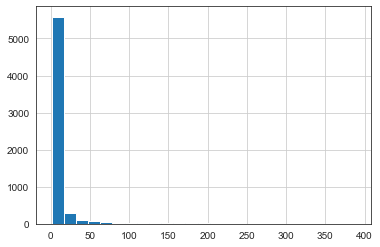

In [91]:
ratings["num of ratings"].hist(bins=25)

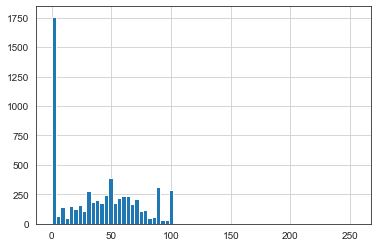

In [92]:
ratings["ratings"].hist(bins=70)

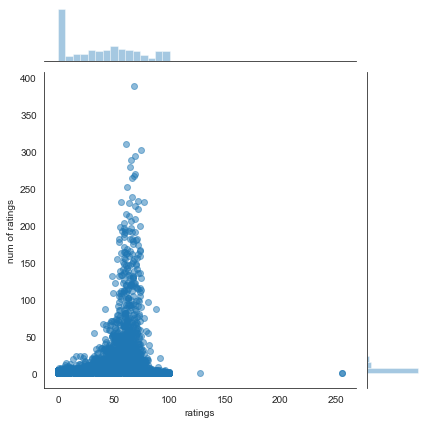

In [93]:
sns.jointplot(x="ratings",y="num of ratings",data=ratings,alpha=0.5)

In [115]:
moviemat=df_main.pivot_table(index="user_id",columns="song_name",values="ratings")
moviemat


song_name,!!!,'Til Tuesday,(Hed) P.E.,*NSYNC,.38 Special,"1,000 Clowns","10,000 Maniacs",1000 Homo DJs,101 Strings Orchestra,112,...,Zero 7,Zeromancer,Zhane,Ziggy Marley,Zion I,Zoegirl,Zombie Nation,Zoo Story,Zoobombs,Zwan
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
ratings.sort_values("num of ratings",ascending=False).head()

,ratings,num of ratings
song_name,,
Linkin Park,68.562982,389
Evanescence,61.376206,311
Eminem,74.353135,303
Missy Elliott,69.257627,295
Red Hot Chili Peppers,65.332180,289


In [66]:
Eminem_user_ratings=moviemat["Eminem"]


In [67]:
moviemat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 1 to 1007
Columns: 6287 entries, !!! to Zwan
dtypes: float64(6287)
memory usage: 48.3 MB


In [69]:
similar_to_eminem=moviemat.corrwith(Eminem_user_ratings)
similar_to_eminem

song_name
!!!                   NaN
'Til Tuesday     0.631668
(Hed) P.E.       0.500000
*NSYNC           0.030152
.38 Special     -0.747038
                   ...   
Zoegirl               NaN
Zombie Nation         NaN
Zoo Story             NaN
Zoobombs              NaN
Zwan             0.729229
Length: 6287, dtype: float64

In [70]:
corr_eminem=pd.DataFrame(similar_to_eminem,columns=["Correlation"])

In [71]:
corr_eminem

,Correlation
song_name,
!!!,NaN
'Til Tuesday,0.631668
(Hed) P.E.,0.500000
*NSYNC,0.030152
.38 Special,-0.747038
...,...
Zoegirl,NaN
Zombie Nation,NaN
Zoo Story,NaN


In [72]:
corr_eminem.dropna(inplace=True)

In [73]:
corr_eminem

,Correlation
song_name,
'Til Tuesday,0.631668
(Hed) P.E.,0.500000
*NSYNC,0.030152
.38 Special,-0.747038
"10,000 Maniacs",-0.154962
...,...
Zero 7,0.254321
Zhane,0.917663
Ziggy Marley,1.000000


In [110]:
result=corr_eminem[corr_eminem["num of ratings"]>100].sort_values("Correlation",ascending=False).head()

In [113]:
print("If you are a fan of eminem, you should prefer these artists")
print("\n")
print(result)

If you are a fan of eminem, you should prefer these artists


           Correlation  num of ratings
song_name                             
Eminem        1.000000             303
LL Cool J     0.660670             118
Ja Rule       0.639992             192
Dr. Dre       0.601028             142
Beyonce       0.594804             232
